Copyright (c) 2019 Computational-Medicine

# Diffusion MRI - Exploration

**Diffusion Imaging In Python**<br>

[DIPY](http://nipy.org/dipy) is a free and open source software project for computational neuroanatomy, focusing mainly on diffusion magnetic resonance imaging (dMRI) analysis. It implements a broad range of algorithms for denoising, registration, reconstruction, tracking, clustering, visualization, and statistical analysis of MRI data.

https://nipy.org/dipy/documentation.html#documentation

### Getting started

Here is a quick snippet showing how to calculate color FA also known as the DEC map. We use a Tensor model to reconstruct the datasets which are saved in a Nifti file along with the b-values and b-vectors which are saved as text files. Finally, we save our result as a Nifti file

In [23]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
home = os.path.expanduser('~')  # To make path to local home directory
# We assume you have made a directory ~/prj/BMED360/results
import nibabel as nib
from dipy.io.image import load_nifti, save_nifti
from dipy.io import read_bvals_bvecs
from dipy.core.gradients import gradient_table
from dipy.reconst.dti import TensorModel
import dipy

print('nibabel version:', nib.__version__)
print('dipy version:', dipy.__version__)

nibabel version: 2.4.0
dipy version: 0.16.0


In [24]:
BIDSHOME = '../data/mri/mybids'
subj = 'sub-01'

fdwi = '%s/%s/dwi/%s_dwi.nii.gz' % (BIDSHOME, subj, subj )
fbval = '%s/%s/dwi/%s_dwi.bval' % (BIDSHOME, subj, subj )
fbvec = '%s/%s/dwi/%s_dwi.bvec' % (BIDSHOME, subj, subj )

data, affine = load_nifti(fdwi)
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)
gtab = gradient_table(bvals, bvecs)

tenmodel = TensorModel(gtab)
tenfit = tenmodel.fit(data)

In [25]:
results_folder = '%s/prj/BMED360/results' % (home)

save_nifti('%s/%s_dwi_colorfa.nii.gz' % (results_folder, subj), tenfit.color_fa, affine)

**Alternatively:**<br>
Let’s start first by loading the dMRI datasets. For this purpose, we use a python library called [nibabel](https://nipy.org/nibabel) which enables us to read and write neuroimaging-specific file formats.

In [26]:
img = nib.load(fdwi)
data = img.get_data()

`data` is a 4D array where the first 3 dimensions are the i, j, k voxel coordinates and the last dimension is the number of non-weighted (S0s) and diffusion-weighted volumes.

We can very easily check the size of `data` in the following way:

In [27]:
print(data.shape)

(100, 100, 60, 129)


We can also check the dimensions of each voxel in the following way:

In [28]:
print(img.header.get_zooms()[:3])

(2.2, 2.2, 2.2)


... and look at the corresponding affine matrix

In [29]:
print(img.affine)

[[-2.19293380e+00  8.67084715e-09  1.76185533e-01  1.06019615e+02]
 [-2.77641532e-03  2.19972682e+00 -3.45574021e-02 -7.04481506e+01]
 [ 1.76163644e-01  3.46687585e-02  2.19266152e+00 -4.71965027e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


We can quickly visualize the results using matplotlib. For example, let’s show here the middle axial slices of volume 0 and volume 10.

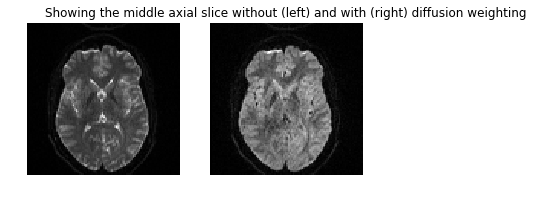

In [30]:
axial_middle = data.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(data[:, :, axial_middle, 10].T, cmap='gray', origin='lower')
plt.title('Showing the middle axial slice without (left) and with (right) diffusion weighting')
plt.show()
#plt.savefig('data.png', bbox_inches='tight')

The next step is to load the b-values and b-vectors from the disk using the function read_bvals_bvecs.

In DIPY, we use an object called `GradientTable` which holds all the acquisition specific parameters, e.g. b-values, b-vectors, timings and others. To create this object you can use the function `gradient_table`, and we can use gtab (the GradientTable object) to show some information about the acquisition parameters.

In [31]:
print(gtab.info)

B-values shape (129,)
         min 0.000000 
         max 3000.000000 
B-vectors shape (129, 3)
         min -1.000000 
         max 0.997159 
None


You can also see the b-values using:

In [32]:
print(gtab.bvals)

[   0.  200.  200.  200.  400.  350.  400.  400.  400.  350.  550.  550.
  550.  550.  750.  750.  750.  950.  950.  950.  950.  950.  950.  950.
  950.  950.  950.  950.  950. 1100. 1100. 1150. 1100. 1100. 1150. 1150.
 1100. 1100. 1150. 1100. 1100. 1500. 1500. 1500. 1500. 1500. 1500. 1700.
 1700. 1700. 1700. 1700. 1700. 1700. 1700. 1700. 1700. 1700. 1700. 1700.
 1700. 1700. 1850. 1850. 1900. 1850. 1900. 1850. 1850. 1900. 1900. 1850.
 1850. 1850. 2050. 2050. 2050. 2050. 2050. 2050. 2050. 2050. 2050. 2050.
 2050. 2050. 2250. 2250. 2250. 2250. 2450. 2450. 2450. 2400. 2450. 2450.
 2450. 2450. 2450. 2400. 2450. 2450. 2600. 2600. 2600. 2600. 2650. 2600.
 2600. 2650. 2600. 2600. 2600. 2600. 2600. 2600. 2600. 2600. 2650. 2600.
 2600. 2650. 2600. 2600. 2600. 2600. 3000. 3000. 3000.]


Or, for example the 10 first b-vectors using:

In [33]:
print(gtab.bvecs[:10, :])

[[ 0.00000e+00  0.00000e+00  0.00000e+00]
 [-2.00991e-06 -1.00000e+00 -2.49706e-05]
 [-7.46485e-02 -2.11623e-02 -9.96985e-01]
 [ 9.97159e-01 -1.06073e-02 -7.45820e-02]
 [-7.00890e-01 -7.10899e-01  5.81085e-02]
 [-7.63193e-01 -1.68344e-02 -6.45951e-01]
 [-5.33965e-02 -7.23716e-01 -6.88029e-01]
 [-5.51955e-02  7.01610e-01 -7.10420e-01]
 [ 7.02425e-01 -7.10657e-01 -3.95580e-02]
 [ 6.50275e-01 -1.68344e-02 -7.59512e-01]]


`gtab` can be used to tell what part of the data is the S0 volumes (volumes which correspond to b-values of 0).

In [34]:
S0s = data[:, :, :, gtab.b0s_mask]

Here, we had only 1 S0 as we can verify by looking at the dimensions of S0s

In [35]:
print(S0s.shape)

(100, 100, 60, 1)


We can save this in a new Nifti file

In [36]:
nib.save(nib.Nifti1Image(S0s, img.affine), '%s/%s_dwi_S0.nii.gz' % (results_folder, subj))

### Tracking

http://nipy.org/dipy/examples_built/tracking_quick_start.html#example-tracking-quick-start